## Annotation

### Dam requirements:

1. Sustainability - dam not moving under the water and alluvium pressure forces
2. No stretching tensions at every type of tension - normal and tangent tension more or equal to zero
3. Compressive tensions dont exceed defined limit

### The goal:
To find out following geometrical characteristics:
1. B
2. n

and plot resulting normal and tangent tensions.

Other characteristics are defined by student's preferences and constructive reasons.

### How calculations is done:

1. Defined initial data as global variables.
2. Defined a fuction, which calculates forces summary (N, Q, M).
3. Fuction test, using initial data.
4. Figuring out how sustainable dam gonna be with different B and n values
5. Plotting B(n) dependence with sustainability criteria close to zero.
6. Tensions calculation and fitting geometry.
7. Final checkout

In [1]:
from math import sqrt, fabs

## Initial Data

In [2]:
#constant
const_pi = 3.1415

#dam profile
B = 46
n = 0.3  #0.1 - 0.5
Ht = 50 #height of triangle profile
H2 = 105.2 - 98 # = 7.2 meters

#section profile
b = 5 #meters
D = 10 #meters
d = 7 #meters

#coast:
Bc = 8 #meters

#reservoir
hw = 0.8 #meters
W_ice = 10 #in tons / m
h_ice = 1 #in meters
H_allu = 24 #in meters - Alluvium layer thickness

#density
dens_c = 2.4 #tons / m ** 3 - Concrete
dens_w = 1 #ton / m ** 3 - Water
dens_allu = 1.05 #tons / m ** 3 - Alluvium

#criteria
#sigma_a = 0.1 #MPa
#sigma_a = 100000 #Pa = N/m**2
#sigma_a = 100 #kN / m**2
sigma_a = 1000 #tons / m**2

#secondary data
Lw = 11 * hw #in meters
dhw = const_pi * hw ** 2 / Lw #in meters
m = B / Ht - n
dc = hw + dhw + 0.6 #meters
ec = 1 #meters

print("in meters:")
print("Dam height (Ht) =", Ht)
print("Dam foot width (B) =", B)
print("(Nakat?) dhw =",dhw)
print("Height above reservoir level (dc) =", dc)
print("m =", m)
print("Lower beef depth (H2) =", H2)

in meters:
Dam height (Ht) = 50
Dam foot width (B) = 46
(Nakat?) dhw = 0.2284727272727273
Height above reservoir level (dc) = 1.6284727272727273
m = 0.6200000000000001
Lower beef depth (H2) = 7.200000000000003


## Functions

In [31]:
def static_calculation(*, show_winter=False, output, print_all=True, detailed=False):
    
    Lw = 11 * hw #in meters
    dhw = const_pi * hw ** 2 / Lw #in meters
    m = B / Ht - n
    dc = hw + dhw + 0.6 #meters
    #ec = 0.5 #meters
    if detailed == True:
        print("Dam coast height =", dc)
        print("m =", m)
    
    #geometrical characteristics

    sqrt1n = sqrt(1 + n ** 2)
    a = (D - d) / 2

    F = B * d + a * (2 * b + a * sqrt1n)
    #print("Area (F) =", F)

    x_cm = (0.5 * B ** 2 * d + a * b ** 2 + a ** 2 * (b + a * sqrt1n / 3) * sqrt1n) / F
    #print("x_A (x_cm) =", x_cm)
    x_B = B - x_cm
    #print("x_B =", x_B)

    Jy_list = [0, 0, 0, 0, 0, 0]
    Jy_list[0] = B ** 3 * d / 12
    Jy_list[1] = a * b ** 3 / 6
    Jy_list[2] = a ** 4 / 18 * sqrt1n ** 1.5
    Jy_list[3] = (x_cm - 0.5 * B) ** 2 * B * d
    Jy_list[4] = 2 * (x_cm - 0.5 * b) ** 2 * a * b
    Jy_list[5] = a ** 2 *(x_cm - b - a * sqrt1n / 3) ** 2 * sqrt1n

    Jy = 0
    for item in Jy_list:
        Jy += item
    #print("Jy =", Jy)

    W_A = Jy / x_cm
    W_B = Jy / x_B

    #print("W_A =", W_A)
    #print("W_B =", W_B)

    #Loads
    #own weight

    G1 = G1 = 0.5 * dens_c * B * Ht * d
    M1 = dens_c * Ht * B * d * (B - 3 * x_cm + n * Ht) / 6

    G2 = dens_c * Ht * (a * sqrt1n + 2 * b) * a
    M2_1 = (2*a + 4*b) * x_cm / 2
    M2_2 = b + n * Ht
    M2_3 = a * (2 * a + 6 * b + 3 * n * Ht) / 6
    M2 = dens_c * Ht * a * (M2_1 - M2_2 - M2_3)

    G3 = dens_c * Bc * D * dc
    M3 = G3 * (x_cm - n * Ht - ec)

    a1 = (0.5 * Bc - ec)
    G4 = 0.5 * dens_c * D * a1 ** 2 / n
    M4 = -G4 * (x_cm - n * Ht + 2 * a1 / 3)

    a2 = (0.5 * Bc - ec)
    G5 = -0.5 * dens_c * n * D * a2 ** 2 / m ** 2
    M5_1 = n * Ht * (1 - 2 * b / (3 * B))
    M5 = G5 * (x_cm - b - M5_1)

    G6_1 = a ** 2 / (6 * B * (1 + n ** 2))
    G6_2 = (n * B + (1-n) * Ht) * (D + 2 * d)
    G6_3 = 3 * (1 + n ** 2) * (D + d) * b * Ht / a
    G6 = -dens_c * G6_1 * (G6_2 + G6_3)
    
    M6_1 = a ** 2 * (D + 2 * d) / (6 * (1 + n ** 2) * B ** 2)
    M6_1_1 = (x_cm - n * Ht - b) * (n * B + Ht * (1 - n)) * B
    M6_1_2 = n * b * Ht ** 2 * (1 - n)
    M6_2 = a ** 3 * (D + 3 * d) / (24 * B ** 2 * sqrt1n)
    M6_2_1 = n * B ** 2 * (2 + n ** 2)
    M6_2_2 = (1-n) * (2*B - n * (1-n) * Ht) * Ht
    M6_3 = a * (D+d) * b * Ht / 2 / B
    M6_3_1 = x_cm - n * Ht - b
    M6_3_2 = 2 * a * (D + 2 * d) * B + 3 * n * (1 + n ** 2) * b * Ht * d
    M6_3_3 = 6 * (1+n**2) * B * d
    M6 = -dens_c * M6_1 * (M6_1_1 + M6_1_2) + dens_c * M6_2 * (M6_2_1 + M6_2_2) - dens_c * M6_3 * (M6_3_1 - M6_3_2 / M6_3_3)

    if detailed == True:
        print("Own weight:")
        print("G =", end=" ")
        print(G1 + G2 + G3 + G4 + G5 + G6)
        print("M =", end=" ")
        print(M1 + M2 + M3 + M4 + M5 + M6)
        print()

    #water pressure

    #upper horizontal
    H1 = Ht
    W_uphor = 0.5 * dens_w * H1 ** 2 * D
    M_uphor = dens_w * H1 ** 3 * D / 6

    #upper vertical
    W_upvert = n * W_uphor
    M_upvert = - dens_w * n * D * H1 ** 2 * (3 * x_cm - n * H1) / 6

    #lower horizontal
    W_lowhor = -0.5 * dens_w * H2 ** 2 * D
    M_lowhor = W_lowhor * H2 / 3

    #lower vertical
    W_lowvert = (n - B * d / Ht / D) * W_lowhor
    M_lowvert_1 = 2 * n * a * (x_cm - b - a / 2 - n * H2 / 3)
    M_lowvert_2 = m * (x_B - m * H2 / 3) * d
    M_lowvert = (M_lowvert_1 + M_lowvert_2) * W_lowhor / D

    #filtering pressure

    U1 = -dens_w * H2 * (D * b + a * (D + d) / 2 + (B - b - a) * d)
    M_U1 = 0
    U2 = -dens_w * (H1 - H2) * (b + a) * D
    M_U2 = -U2 * (x_cm - (b + a) / 2)

    #alluvium pressure

    W_alluhor = 0.5 * dens_allu * H_allu ** 2 * D
    M_alluhor = W_alluhor * H_allu / 3

    W_alluvert = 0.5 * dens_allu * n * H_allu ** 2 * D
    M_alluvert = -W_alluvert *  (x_cm - n * H_allu / 3)

    #wave pressure

    W_wavhor = dens_w * hw * (Lw / const_pi + hw / 2) * D / 2
    M_wavhor = W_wavhor * (H1 - Lw / 2 / const_pi + 3 * hw / 8)

    W_wavvert = W_wavhor * n

    #ice pressure

    M_ice = W_ice * (H1 - 0.45 * h_ice)

    #summary

    N = G1 + G2 + G3 + G4 + G5 + G6 + W_upvert + W_lowvert + U1 + U2 + W_wavvert + W_alluvert
    Qsummer = W_uphor + W_lowhor + W_alluhor + W_wavhor
    Qwinter = W_uphor + W_lowhor + W_alluhor + W_ice
    Msummer = M1 + M2 + M3 + M4 + M5 + M6 + M_uphor + M_lowhor + M_upvert + M_lowvert + M_U2 + M_alluhor + M_alluvert + M_wavhor
    Mwinter = M1 + M2 + M3 + M4 + M5 + M6 + M_uphor + M_lowhor + M_upvert + M_lowvert + M_U2 + M_alluhor + M_alluvert + M_ice

    #stretching stress criteria
    #stretch = sigma_a * B ** 2 - N * B + 6 * Msummer
    stretch = N / F + Msummer / W_A
    
    #sustainability criteria
    sustain = 0.72 * N + 20 * F
    sustain2 = Qsummer * 1.2
    
    if print_all == True:
        print("B =", B, end=", ")
        print("Ht =", Ht, end=", ")
        print("n =", n)
        print("N =", N, "tons")
        print("Qsummer =", Qsummer, "tons", "Msummer =" , Msummer, "tons * m", sep=" | ")
        if show_winter == True:
            print("Qwinter =", Qwinter, "tons", "Mwinter =" , Mwinter, "tons * m", sep=" | ")
        print()
        print("Stretching stress criteria (must be more than 10) =", stretch)
        print()
        print("Sustainability criteria (must be close to 0) =", sustain - sustain2)
        
    if output == "Msummer":
        return Msummer
    if output == "Qsummer":
        return Qsummer
    if output == "N":
        return N
    if output == "stretch":
        return stretch
    if output == "sustain":
        return sustain - sustain2
    if output == "p_a":
        return sqrt(W_uphor ** 2 + W_upvert ** 2) + sqrt(W_alluhor ** 2 + W_alluvert ** 2)
    if output == "p_b":
        return sqrt(W_lowhor ** 2 + W_lowvert ** 2)

# Finding optimal profile

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Detailed example of calculation

In [5]:
B = 50
n = 0.3
Ht = 50
static_calculation(show_winter=True, output=None, detailed=True)

Dam coast height = 1.6284727272727273
m = 0.7
Own weight:
G = 23515.616076635888
M = -7725.075958992404

B = 50, Ht = 50, n = 0.3
N = 22854.137528171777 tons
Qsummer = | 15277.604838452968 | tons | Msummer = | 188264.23790184493 | tons * m
Qwinter = | 15274.8 | tons | Mwinter = | 188133.58904594585 | tons * m

Stretching stress criteria (must be more than 10) = 117.87213214940161

Sustainability criteria (must be close to 0) = 5468.834593430212


## Plotting B

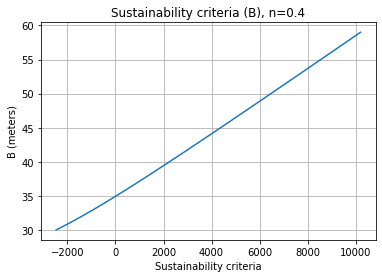

Min stretch stress criteria value (must be greater than 10):
97.95

Sustainability criteria values: 
Sustain  | B
____________
-2470.50 | 30
-1920.47 | 31
-1403.14 | 32
-908.939 | 33
-431.563 | 34
33.26209 | 35
488.5274 | 36
936.3735 | 37
1378.367 | 38
1815.678 | 39
2249.193 | 40
2679.595 | 41
3107.417 | 42
3533.082 | 43
3956.924 | 44
4379.218 | 45
4800.184 | 46
5220.006 | 47
5638.833 | 48
6056.793 | 49
6473.992 | 50
6890.518 | 51
7306.450 | 52
7721.852 | 53
8136.780 | 54
8551.284 | 55
8965.405 | 56
9379.180 | 57
9792.643 | 58
10205.82 | 59


In [6]:
B = 40
n = 0.4
stretch_list = []
sustain_list = []
B_list = []

B = 30

for i in range(30):
    B_list.append(B)
    sustain_list.append(static_calculation(show_winter=False, output="sustain", print_all=False))
    stretch_list.append(static_calculation(show_winter=False, output="stretch", print_all=False))
    B += 1

fig, ax = plt.subplots()
ax.plot(sustain_list, B_list)
ax.set(ylabel = "B (meters)", xlabel = "Sustainability criteria", title = "Sustainability criteria (B), n="+str(n))
ax.grid()

#fig.savefig("test.png")
plt.show()

print("Min stretch stress criteria value (must be greater than 10):")
print(str(min(stretch_list))[:5])
print()
print("Sustainability criteria values: ")
print("Sustain  | B")
print("____________")
for i in range(len(B_list)):
    print(str(sustain_list[i])[:8], B_list[i], sep=" | ")

## Plotting n

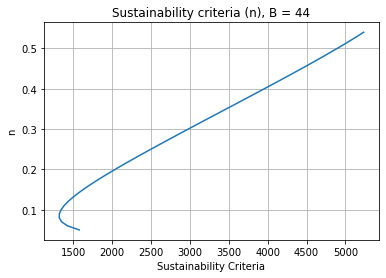

Min stretch stress criteria value (must be greater than 10):
117.7

Sustainability criteria values: 
Sustain  | n
____________
1575.963 | 0.05
1425.638 | 0.06
1349.335 | 0.07
1319.279 | 0.08
1320.038 | 0.09
1342.349 | 0.09
1380.318 | 0.10
1430.013 | 0.11
1488.709 | 0.12
1554.460 | 0.13
1625.835 | 0.15
1701.761 | 0.16
1781.412 | 0.17
1864.148 | 0.18
1949.458 | 0.19
2036.934 | 0.20
2126.241 | 0.21
2217.104 | 0.22
2309.293 | 0.23
2402.613 | 0.24
2496.899 | 0.25
2592.008 | 0.26
2687.814 | 0.27
2784.206 | 0.28
2881.086 | 0.29
2978.364 | 0.30
3075.958 | 0.31
3173.793 | 0.32
3271.795 | 0.33
3369.897 | 0.34
3468.033 | 0.35
3566.136 | 0.36
3664.144 | 0.37
3761.989 | 0.38
3859.606 | 0.39
3956.924 | 0.40
4053.873 | 0.41
4150.375 | 0.42
4246.349 | 0.43
4341.706 | 0.44
4436.352 | 0.45
4530.180 | 0.46
4623.076 | 0.47
4714.911 | 0.48
4805.543 | 0.49
4894.809 | 0.50
4982.530 | 0.51
5068.500 | 0.52
5152.482 | 0.53
5234.209 | 0.54


In [7]:
B = 44
n = 0.4
stretch_list = []
n_list = []
sustain_list = []

n = 0.05
for i in range(50):
    n_list.append(n)
    sustain_list.append(static_calculation(show_winter=False, output="sustain", print_all=False))
    stretch_list.append(static_calculation(show_winter=False, output="stretch", print_all=False))
    n += 0.01

fig, ax = plt.subplots()
ax.plot(sustain_list, n_list)
#ax.ticklabel_format(style = 'plain')

ax.set(xlabel='Sustainability Criteria', ylabel='n',
       title='Sustainability criteria (n), B = '+str(B))
ax.grid()

#fig.savefig("test.png")
plt.show()

print("Min stretch stress criteria value (must be greater than 10):")
print(str(min(stretch_list))[:5])
print()
print("Sustainability criteria values: ")
print("Sustain  | n")
print("____________")
for i in range(len(n_list)):
    print(str(sustain_list[i])[:8], str(n_list[i])[:4], sep=" | ")

## Figuring out B(n) dependence

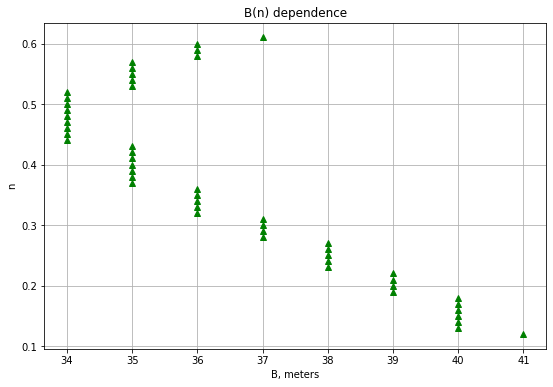

In [8]:
B = 30
n = 0.3
B_list = []
n_list = []

n = 0.12
for i in range(50):
    B = 30
    sustain_min = None
    B_sustain = None
    for j in range(31):
        #sustain_list.append(abs(static_calculation(show_winter=False, output="sustain", print_all=False)))
        current_sustain = abs(static_calculation(show_winter=False, output="sustain", print_all=False))
        if sustain_min == None:
            sustain_min = current_sustain
        if B_sustain == None:
            B_sustain = B
        if current_sustain < sustain_min:
            sustain_min = current_sustain
            B_sustain = B
        B += 1
    B_list.append(B_sustain)
    n_list.append(n)
    n += 0.01
    
#plotting

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(B_list, n_list ,"g^")
#ax.ticklabel_format(style = 'plain')

ax.set(xlabel='B, meters', ylabel='n',
       title='B(n) dependence')
ax.grid()

#fig.savefig("test.png")
plt.show()

## Overall check

In [11]:
B = 35
n = 0.4
static_calculation(show_winter=True, output=None, print_all=True)

B = 35, Ht = 50, n = 0.4
N = 18219.33530303631 tons
Qsummer = | 15277.604838452968 | tons | Msummer = | 259579.30610387775 | tons * m
Qwinter = | 15274.8 | tons | Mwinter = | 259448.65724797867 | tons * m

Stretching stress criteria (must be more than 10) = 219.9084276502294

Sustainability criteria (must be close to 0) = 33.26209530679262


# Tension and diagrams

In [30]:
def sigma_z(out=None):
    N_t = static_calculation(show_winter=False, output="N", print_all=False)

    Lw = 11 * hw #in meters
    dhw = const_pi * hw ** 2 / Lw #in meters
    m = B / Ht - n
    dc = hw + dhw + 0.6 #meters
    sqrt1n = sqrt(1 + n ** 2)
    a = (D - d) / 2
    F = B * d + a * (2 * b + a * sqrt1n)
    x_cm = (0.5 * B ** 2 * d + a * b ** 2 + a ** 2 * (b + a * sqrt1n / 3) * sqrt1n) / F
    x_B = B - x_cm

    Jy_list = [0, 0, 0, 0, 0, 0]
    Jy_list[0] = B ** 3 * d / 12
    Jy_list[1] = a * b ** 3 / 6
    Jy_list[2] = a ** 4 / 18 * sqrt1n ** 1.5
    Jy_list[3] = (x_cm - 0.5 * B) ** 2 * B * d
    Jy_list[4] = 2 * (x_cm - 0.5 * b) ** 2 * a * b
    Jy_list[5] = a ** 2 *(x_cm - b - a * sqrt1n / 3) ** 2 * sqrt1n

    Jy = 0
    for item in Jy_list:
        Jy += item
    
    W_A = Jy / x_cm
    W_B = Jy / x_B

    e = static_calculation(show_winter=False, output="Msummer", print_all=False) / N_t

    sigma_zA = (N_t / F) * (1 - e * F / W_A)
    sigma_zB = (N_t / F) * (1 - e * F / W_B)

    if out == "A":
        return sigma_zA
    elif out == "B":
        return sigma_zB

B = 35
n = 0.4
print("B  |  sigma_zA")
print("____")
for i in range(20):
    print(B, sigma_z(out="A"),sep=" | ")
    B += 1

B = 49

"""
#plotting

for i in range(100):
    sigma_z = (sigma_zA * (x_B - x) + sigma_zB * (x - x_A)) / B

"""

B  |  sigma_zA
____
35 | -81.05388519572523
36 | -71.6982345121185
37 | -63.1334326697812
38 | -55.25855295934419
39 | -47.99085334662123
40 | -41.26145103516146
41 | -35.012260979872416
42 | -29.193770999515372
43 | -23.763386570527405
44 | -18.684173664681463
45 | -13.923886276132734
46 | -9.454201916371304
47 | -5.250111964813311
48 | -1.289429335486693
49 | 2.4476135843836055
50 | 5.978696551742939
51 | 9.319687413932344
52 | 12.48487355399574
53 | 15.487157396040287
54 | 18.338222613455258


In [36]:
p_a = static_calculation(output="p_a", print_all=False)
print("p_a =", p_a)
sigma_xA = (1 - n ** 2) * p_a  + n ** 2 * sigma_z(out="A")
print("sigma_xA =",sigma_xA)

p_b = static_calculation(output="p_b", print_all=False)
print("p_b =", p_b)
sigma_xB = (1 - m ** 2) * p_b  + n ** 2 * sigma_z(out="B")
print("sigma_xB =", sigma_xB)

"""
c1 = 
c2 = 
d_x = None
#loop start
if x_A <= x < c1:
    d_x = D
elif c1 <= x <= c2:
    d_x = D - (D - d) * (x - c1) / (c2 - c1)
elif c2 < x <= x_B:
    d_x = d
else:
    print("error")
    break
sigma_x = (sigma_xA * (x_B - x) * D + sigma_xB * (x - x_A) * d) / (B * d_x)

loop end
"""

p_a = 16719.85969319121
sigma_xA = 14045.07376045412


In [39]:
#tau_xz = tau_zx
tau_xzA = n * (p_a - sigma_z(out="A"))
print(tau_xzA)
tau_xzB = -m * (p_b - sigma_z(out="B"))
print(tau_xzB)
"""
c1 = 
c2 = 
d_x = None
#loop start
if x_A <= x < c1:
    d_x = D
elif c1 <= x <= c2:
    d_x = D - (D - d) * (x - c1) / (c2 - c1)
elif c2 < x <= x_B:
    d_x = d
else:
    print("error")
    break
tau_tilda_xz = tau_xzA * (x_B - x) * D + tau_xzB * (x - x_A) * d / (B * d_x)

loop end
"""

"""

deltaQ = Q - (tau_xzA * D + tau_xzB * d) * B / 2

"""

6686.964831842732
-158.23295359735627


In [ ]:
"""



"""